**1. Importación de bibliotecas a utilizar en el estudio e importación de los datos:**

In [1]:
import numpy as np                                        # Biblioteca de funciones matemáticas
import pandas as pd                                       # Biblioteca para manipulación de marcos de datos
from pandas.plotting import scatter_matrix                # Para generar matriz de diagramas de dispersión
import matplotlib.pyplot as plt                           # Biblioteca para salida gráfica
import geostatspy.GSLIB as GSLIB                          # Utilidades GSLIB y funciones envueltas
import geostatspy.geostats as geostats                    # GSLIB convertido a Python
import os                                                 # Para configurar el directorio de trabajo
from numpy import arange, exp                             #Función exponencial desde Numpy
plt.style.use('seaborn-bright')                                     # Estilo visual de gráficos 


os.chdir("C:/Users/heber/Documents/GSLIB_FOLDER") # ruta de ejecutables de GSLIB
df = pd.read_excel("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/" + "datos.xlsx", sep=",") #Ruta del archivo datos.xlsx
df["Coordenates X (ETRS89)"] = df["Coordenates X (ETRS89)"]/10000 #se encoge el numero referente al metraje del eje X
df["Coordenates Y (ETRS89)"] = df["Coordenates Y (ETRS89)"]/10000 #se encoge el numero referente al metraje del eje Y
df.head(1) #se muestra la primera fila de la tabla de datos a trabajar.

,id,ESTACION,Coordenates X (ETRS89),Coordenates Y (ETRS89),NO (µg/m3),NO2 (µg/m3),NOX (µg/m3),PM10 (µg/m3),Province,Town,Address
0,1,3_DE_MARZO,52.714144,474.488289,8.782967,21.18956,34.472527,13.518414,Araba/Álava,Vitoria-Gasteiz,"Plaza Tres de Marzo, s/n"


**2. Agrupación de los datos por provincia;** Bizkaia, Gipuzkoa, Araba/Álava.

In [2]:
df2 = df.groupby(['Province']) #agrupación de los datos por provincia.
df2.first() #Visualización de las provincias existentes. En este caso 3. 

,id,ESTACION,Coordenates X (ETRS89),Coordenates Y (ETRS89),NO (µg/m3),NO2 (µg/m3),NOX (µg/m3),PM10 (µg/m3),Town,Address
Province,,,,,,,,,,
Araba/Álava,1,3_DE_MARZO,52.714144,474.488289,8.782967,21.189560,34.472527,13.518414,Vitoria-Gasteiz,"Plaza Tres de Marzo, s/n"
Bizkaia,2,ABANTO,49.398717,479.640656,5.199446,16.462604,24.204420,12.486567,Abanto y Ciérvana-Abanto Zierbena,"Avda. del Minero, 2. Ayuntamiento"
Gipuzkoa,6,ANDOAIN,57.932100,478.586200,9.400000,24.991667,39.250000,15.858333,Andoain,Ikastola Aita larramendi


In [3]:
df_bis = df2.get_group('Bizkaia') #Dataframe para la pronvicia de Biskaia
df_gip = df2.get_group('Gipuzkoa') #Dataframe para la pronvicia de Gipuzkoa
df_ala = df2.get_group('Araba/Álava') #Dataframe para la pronvicia de Álava

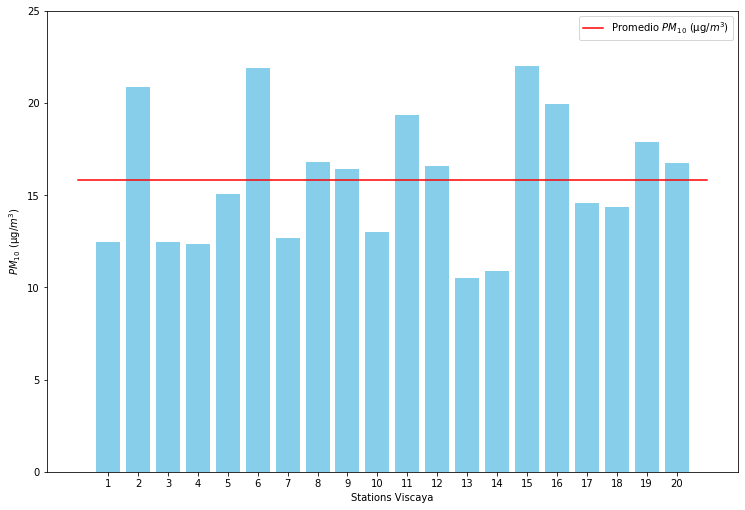

In [4]:
n = range(1,21,1)
m = df_bis["PM10 (µg/m3)"]
plt.subplot(111)
plt.bar(n, m, align='center', alpha=1, color="skyblue")
plt.xticks(range(1,21))
plt.plot([0,21],[df_bis["PM10 (µg/m3)"].mean(),df_bis["PM10 (µg/m3)"].mean()],color = 'red', label="Promedio $PM_1$$_0$ (µg/$m^3$)")
plt.xlabel("Stations Viscaya")
plt.ylabel('$PM_1$$_0$ (µg/$m^3$)')
plt.legend()
plt.ylim(0,25)
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/Viscaya_stations.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

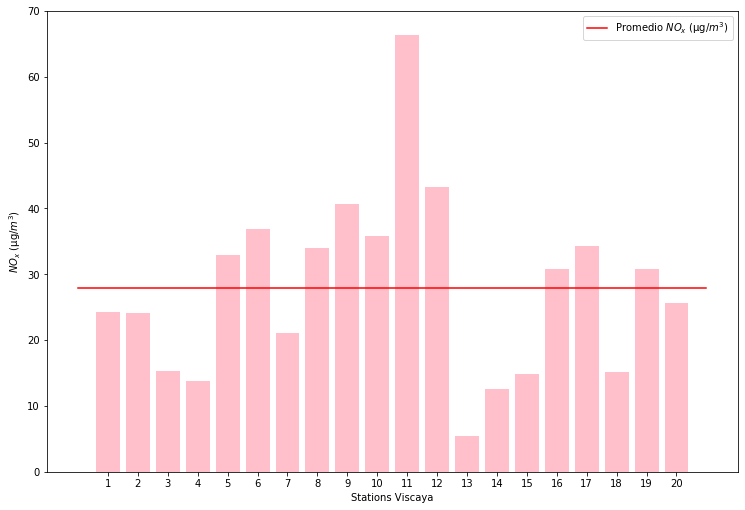

In [5]:
n = range(1,21,1)
m = df_bis["NOX (µg/m3)"]
plt.subplot(111)
plt.bar(n, m, align='center', alpha=1, color="pink")
plt.xticks(range(1,21))
plt.plot([0,21],[df_bis["NOX (µg/m3)"].mean(),df_bis["NOX (µg/m3)"].mean()],color = 'red', label="Promedio $NO_x$ (µg/$m^3$)")
plt.xlabel("Stations Viscaya")
plt.ylabel('$NO_x$ (µg/$m^3$)')
plt.legend()
plt.ylim(0,70)
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/Viscaya_stations_nox.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

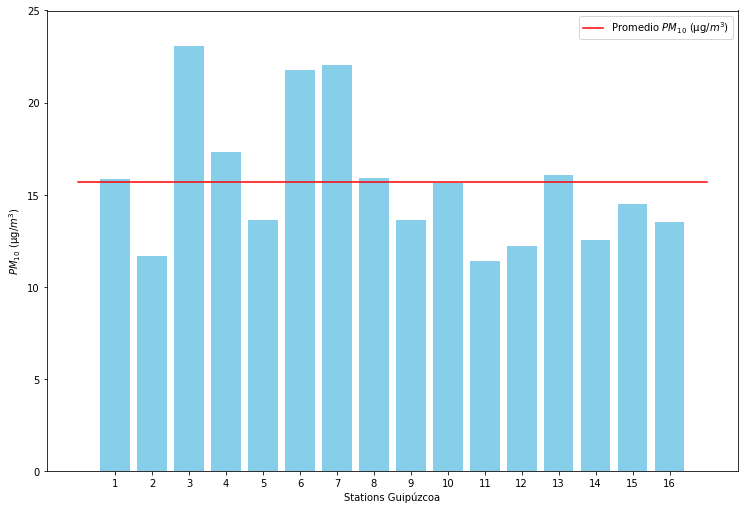

In [6]:
n = range(1,17,1)
m = df_gip["PM10 (µg/m3)"]
plt.subplot(111)
plt.bar(n, m, align='center', alpha=1, color="skyblue")
plt.xticks(range(1,17))
plt.plot([0,17],[df_gip["PM10 (µg/m3)"].mean(),df_gip["PM10 (µg/m3)"].mean()],color = 'red', label="Promedio $PM_1$$_0$ (µg/$m^3$)")
plt.xlabel("Stations Guipúzcoa")
plt.ylabel('$PM_1$$_0$ (µg/$m^3$)')
plt.legend()
plt.ylim(0,25)
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/Guipúzcoa_stations.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

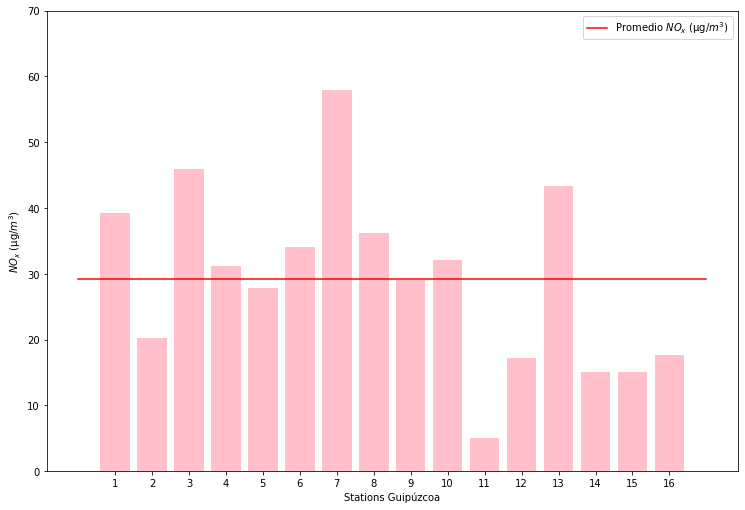

In [7]:
n = range(1,17,1)
m = df_gip["NOX (µg/m3)"]
plt.subplot(111)
plt.bar(n, m, align='center', alpha=1, color="pink")
plt.xticks(range(1,17))
plt.plot([0,17],[df_gip["NOX (µg/m3)"].mean(),df_gip["NOX (µg/m3)"].mean()],color = 'red', label="Promedio $NO_x$ (µg/$m^3$)")
plt.xlabel("Stations Guipúzcoa")
plt.ylabel('$NO_x$ (µg/$m^3$)')
plt.legend()
plt.ylim(0,70)
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/Guipúzcoa_stations_nox.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

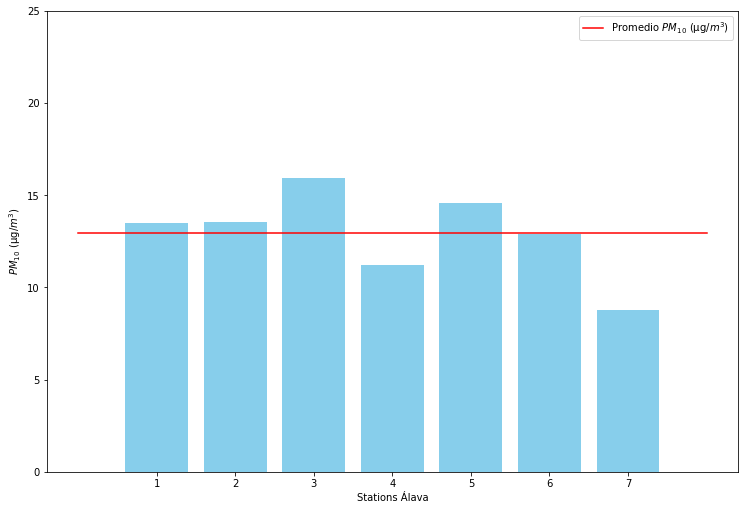

In [8]:
n = range(1,8,1)
m = df_ala["PM10 (µg/m3)"]
plt.subplot(111)
plt.bar(n, m, align='center', alpha=1, color="skyblue")
plt.xticks(range(1,8))
plt.plot([0,8],[df_ala["PM10 (µg/m3)"].mean(),df_ala["PM10 (µg/m3)"].mean()],color = 'red', label="Promedio $PM_1$$_0$ (µg/$m^3$)")
plt.xlabel("Stations Álava")
plt.ylabel('$PM_1$$_0$ (µg/$m^3$)')
plt.legend()
plt.ylim(0,25)
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/Álava_stations.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

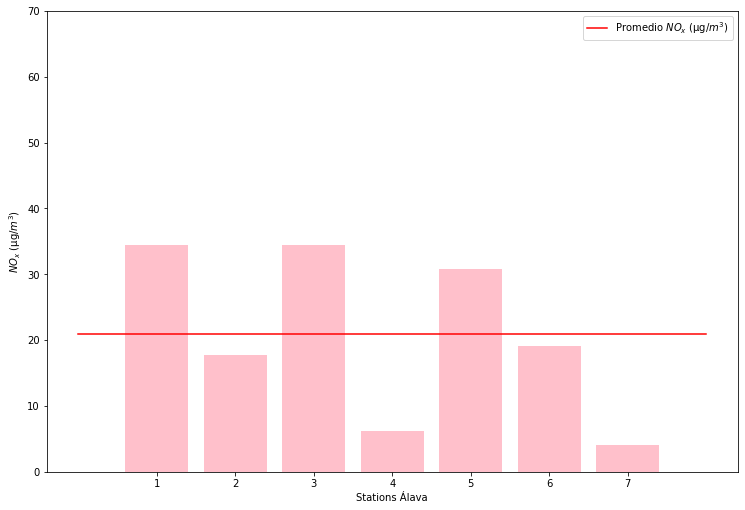

In [9]:
n = range(1,8,1)
m = df_ala["NOX (µg/m3)"]
plt.subplot(111)
plt.bar(n, m, align='center', alpha=1, color="pink")
plt.xticks(range(1,8))
plt.plot([0,8],[df_ala["NOX (µg/m3)"].mean(),df_ala["NOX (µg/m3)"].mean()],color = 'red', label="Promedio $NO_x$ (µg/$m^3$)")
plt.xlabel("Stations Álava")
plt.ylabel('$NO_x$ (µg/$m^3$)')
plt.legend()
plt.ylim(0,70)
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/Álava_stations_nox.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

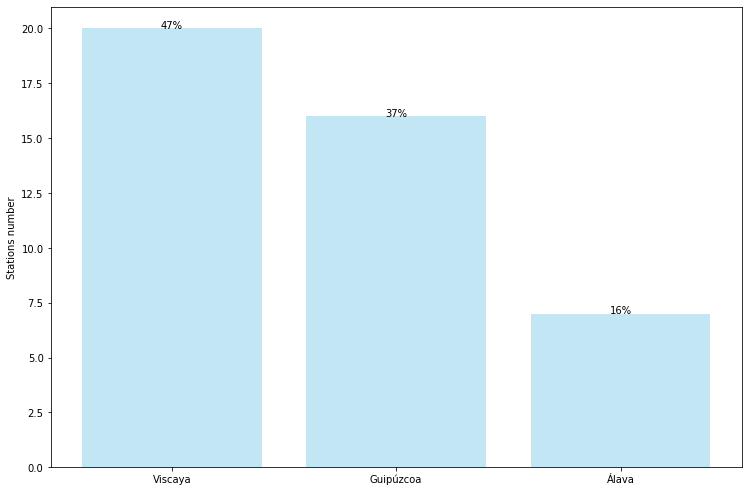

In [10]:
a = df_bis["ESTACION"].count() #Numero de datos en Biskaia
b = df_gip["ESTACION"].count() #Numero de datos en Gipuzkoa
c = df_ala["ESTACION"].count() #Numero de datos en Alava

objects = ('Viscaya', 'Guipúzcoa', 'Álava')
y_pos = np.arange(len(objects))
performance = [a,b,c]
plt.subplot(111)
plt.bar(y_pos, performance, align='center', alpha=0.5, color="skyblue")
plt.xticks(y_pos, objects)
plt.ylabel('Stations number')
plt.text(0, 20, "47%", ha='center')
plt.text(1, 16, "37%", ha='center')
plt.text(2, 7, "16%", ha='center')
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/bar_stations.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

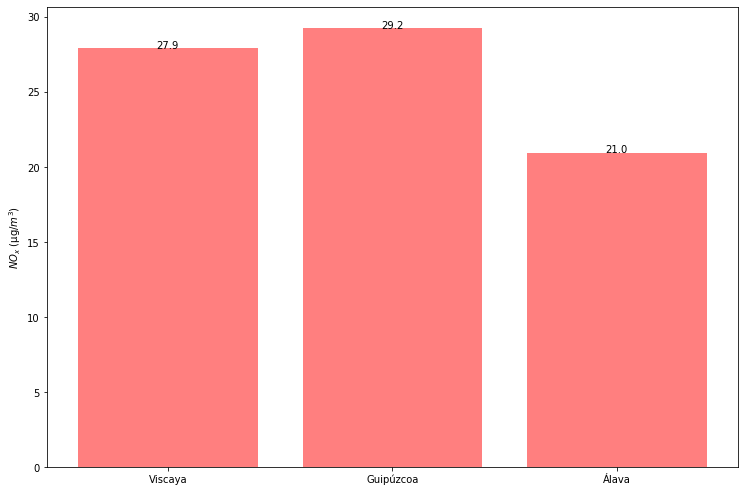

In [11]:
nox_mean_1 = df_bis["NOX (µg/m3)"].mean() 
nox_mean_2 = df_gip["NOX (µg/m3)"].mean()
nox_mean_3 = df_ala["NOX (µg/m3)"].mean() 

objects = ('Viscaya', 'Guipúzcoa', 'Álava')
y_pos = np.arange(len(objects))
performance = [nox_mean_1,nox_mean_2,nox_mean_3]
plt.subplot(111)
plt.bar(y_pos, performance, align='center', alpha=0.5, color="red")
plt.xticks(y_pos, objects)
plt.text(0, df_bis["NOX (µg/m3)"].mean() , round(df_bis["NOX (µg/m3)"].mean(),1), ha='center')
plt.text(1, df_gip["NOX (µg/m3)"].mean(), round(df_gip["NOX (µg/m3)"].mean(),1), ha='center')
plt.text(2, df_ala["NOX (µg/m3)"].mean() , round(df_ala["NOX (µg/m3)"].mean(),1) , ha='center')
plt.ylabel('$NO_x$ (µg/$m^3$)')
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/nox_province.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

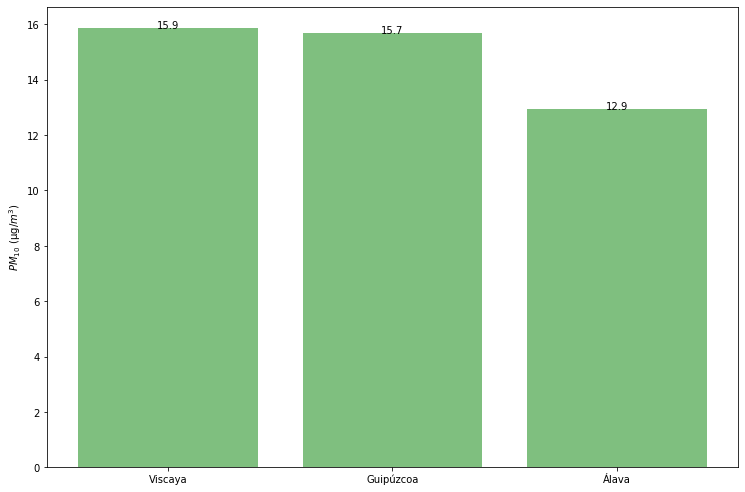

In [12]:
pm10_mean_1 = df_bis["PM10 (µg/m3)"].mean() 
pm10_mean_2 = df_gip["PM10 (µg/m3)"].mean()
pm10_mean_3 = df_ala["PM10 (µg/m3)"].mean() 

objects = ('Viscaya', 'Guipúzcoa', 'Álava')
y_pos = np.arange(len(objects))
performance = [pm10_mean_1,pm10_mean_2,pm10_mean_3]
plt.subplot(111)
plt.bar(y_pos, performance, align='center', alpha=0.5, color="green")
plt.xticks(y_pos, objects)
plt.text(0, df_bis["PM10 (µg/m3)"].mean() , round(df_bis["PM10 (µg/m3)"].mean(),1), ha='center')
plt.text(1, df_gip["PM10 (µg/m3)"].mean(), round(df_gip["PM10 (µg/m3)"].mean(),1), ha='center')
plt.text(2, df_ala["PM10 (µg/m3)"].mean() , round(df_ala["PM10 (µg/m3)"].mean(),1) , ha='center')
plt.ylabel('$PM_1$$_0$ (µg/$m^3$)')
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/pm10_province.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

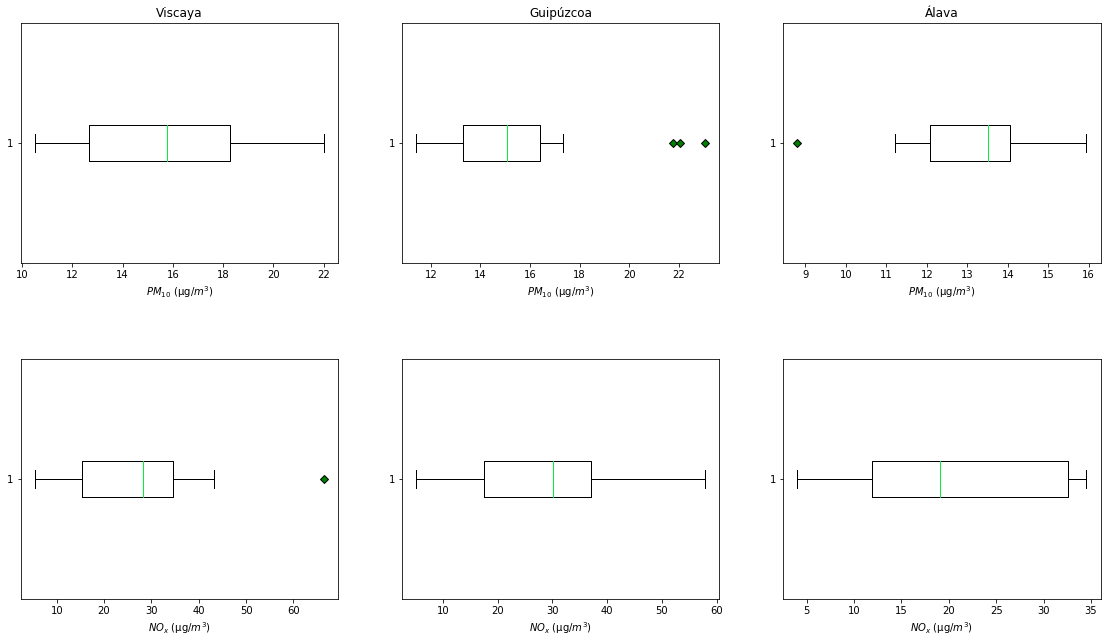

In [13]:
diamantes = dict(markerfacecolor='g', marker='D')

#fig = plt.figure(figsize=(13,9))
plt.subplot(231)
plt.boxplot(df_bis["PM10 (µg/m3)"], vert=False, flierprops=diamantes, showfliers=True)
plt.xlabel("$PM_1$$_0$ (µg/$m^3$)")
plt.title("Viscaya")
plt.subplot(232)
plt.boxplot(df_gip["PM10 (µg/m3)"], vert=False, flierprops=diamantes, showfliers=True)
plt.xlabel("$PM_1$$_0$ (µg/$m^3$)")
plt.title("Guipúzcoa")
plt.subplot(233)
plt.boxplot(df_ala["PM10 (µg/m3)"], vert=False, flierprops=diamantes, showfliers=True)
plt.xlabel("$PM_1$$_0$ (µg/$m^3$)")
plt.title("Álava")
plt.subplot(234)
plt.boxplot(df_bis["NOX (µg/m3)"], vert=False, flierprops=diamantes, showfliers=True)
plt.xlabel("$NO_x$ (µg/$m^3$)")
plt.title("")
plt.subplot(235)
plt.boxplot(df_gip["NOX (µg/m3)"], vert=False, flierprops=diamantes, showfliers=True)
plt.xlabel("$NO_x$ (µg/$m^3$)")
plt.title("")
plt.subplot(236)
plt.boxplot(df_ala["NOX (µg/m3)"], vert=False, flierprops=diamantes, showfliers=True)
plt.xlabel("$NO_x$ (µg/$m^3$)")
plt.title("")
#plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/boxplot_pm10_nox.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=2, wspace=0.2, hspace=0.4)
plt.show()

In [14]:
df_ala.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,7.0,17.142857,13.284434,1.000000,6.500000,19.000000,24.500000,38.000000
Coordenates X (ETRS89),7.0,52.082247,2.216091,48.107367,51.453173,52.714144,52.946981,54.953914
Coordenates Y (ETRS89),7.0,474.407705,2.011325,470.738947,474.387027,474.473813,474.593070,477.680982
NO (µg/m3),7.0,4.956619,3.437539,0.771588,2.276217,4.480556,8.054396,8.782967
NO2 (µg/m3),7.0,13.293777,7.768797,2.355556,7.768630,13.278237,20.319066,21.247253
NOX (µg/m3),7.0,20.953477,12.793719,4.025000,11.932070,19.052342,32.620549,34.491758
PM10 (µg/m3),7.0,12.932667,2.325061,8.801170,12.076712,13.518414,14.059424,15.936813


**3. Visualización de la variable PM10 en la comunidad autonoma Vasca**: 

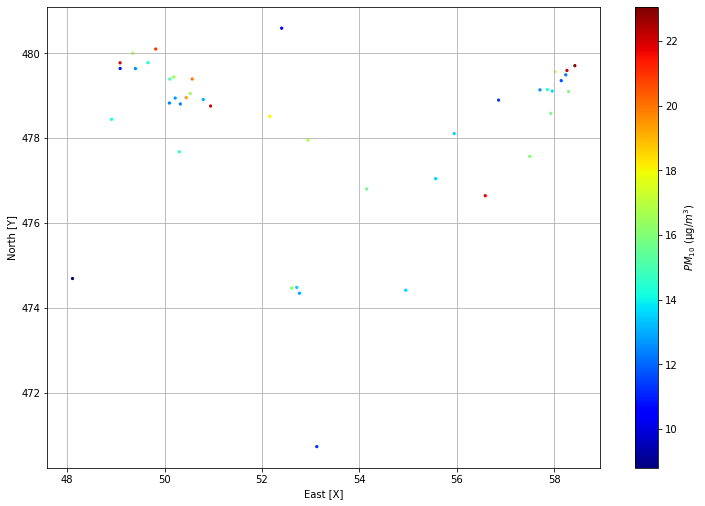

In [15]:
#Visualización de los promedios anuales de PM10 por estación. 

marker_size=5
cmap= plt.cm.jet
plt.subplot(111)
plt.scatter(df["Coordenates X (ETRS89)"], df["Coordenates Y (ETRS89)"], marker_size, df["PM10 (µg/m3)"], cmap = cmap)
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
cbar=plt.colorbar()
plt.grid(True)
cbar.set_label('$PM_1$$_0$ (µg/$m^3$)', labelpad=+5)
#plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/puntos_variable_x_pm10.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

**4. Visualización de la variable PM10 en Biskaia**: 

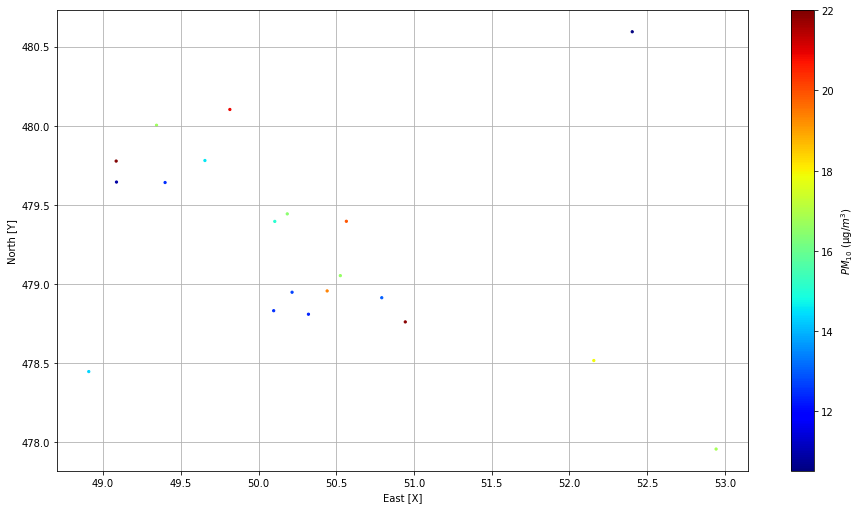

In [16]:
plt.subplot(111)
plt.scatter(df_bis["Coordenates X (ETRS89)"], df_bis["Coordenates Y (ETRS89)"], marker_size, df_bis["PM10 (µg/m3)"], cmap = cmap)
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
cbar=plt.colorbar()
plt.grid(True)
cbar.set_label('$PM_1$$_0$ (µg/$m^3$)', labelpad=+5)
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/biskaia_pm10.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

**5. Visualización de la variable PM10 en Gipuzkoa:**

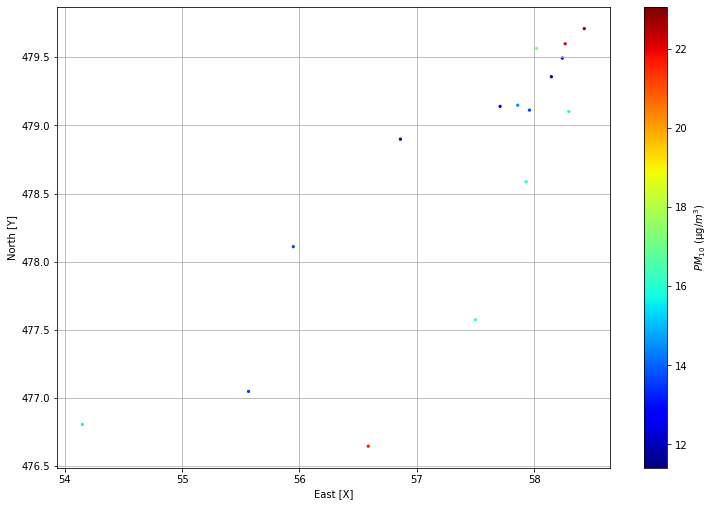

In [17]:
plt.subplot(111)
plt.scatter(df_gip["Coordenates X (ETRS89)"], df_gip["Coordenates Y (ETRS89)"], marker_size, df_gip["PM10 (µg/m3)"], cmap = cmap)
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
cbar=plt.colorbar()
plt.grid(True)
cbar.set_label('$PM_1$$_0$ (µg/$m^3$)', labelpad=+5)
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/Gipuzkoa_pm10.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

**6. Visualización de la variable PM10 en Araba/Álava:**

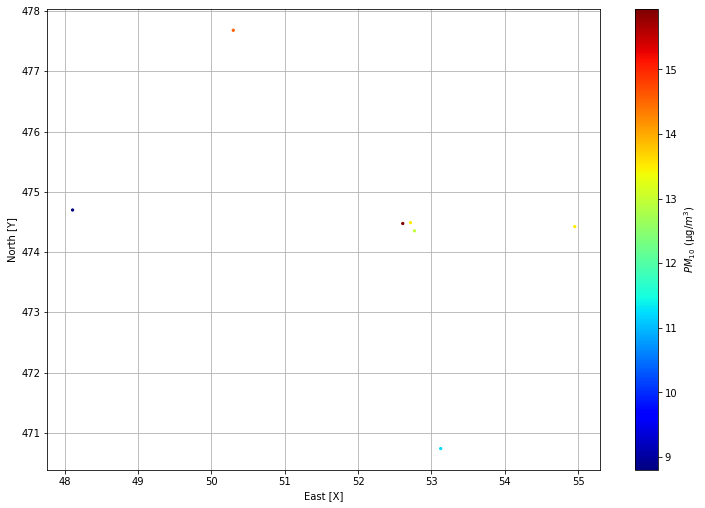

In [18]:
plt.subplot(111)
plt.scatter(df_ala["Coordenates X (ETRS89)"], df_ala["Coordenates Y (ETRS89)"], marker_size, df_ala["PM10 (µg/m3)"], cmap = cmap)
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
cbar=plt.colorbar()
plt.grid(True)
cbar.set_label('$PM_1$$_0$ (µg/$m^3$)', labelpad=+5)
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/Alava_pm10.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

**7. Estadísticas descriptivas generales de la variable PM10:**

In [19]:
df["PM10 (µg/m3)"].describe().transpose()

count    43.000000
mean     15.311702
std       3.559351
min       8.801170
25%      12.630450
50%      14.580175
75%      16.789548
max      23.050000
Name: PM10 (µg/m3), dtype: float64

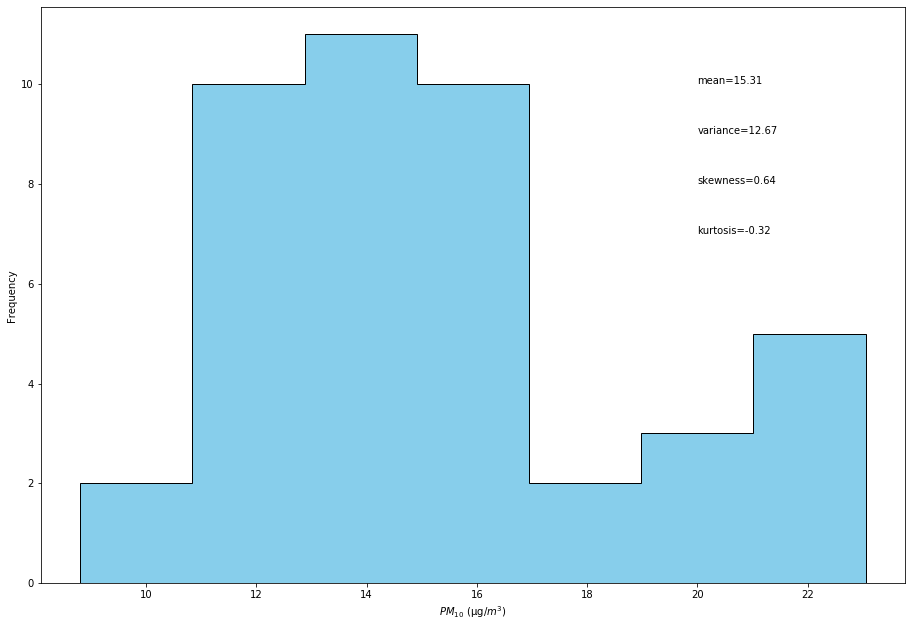

In [20]:
plt.subplot(111)
plt.hist(df['PM10 (µg/m3)'], bins="sturges",color='skyblue',edgecolor='black', histtype='stepfilled',cumulative=False, label='Z2')
plt.xlabel("$PM_1$$_0$ (µg/$m^3$)")
plt.ylabel("Frequency")
plt.text(20, 10, r'mean=15.31')
plt.text(20, 9, r'variance=12.67')
plt.text(20, 8, r'skewness=0.64')
plt.text(20, 7, r'kurtosis=-0.32')
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/hist_pm10.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2, wspace=0.2, hspace=0.2)
plt.show()

In [21]:
df_sub = df.iloc[:,[4,5,6,7]] # Dataframe solo con las 4 variables de interés.
df_sub_2 = df_sub
df_sub.head()

,NO (µg/m3),NO2 (µg/m3),NOX (µg/m3),PM10 (µg/m3)
0,8.782967,21.189560,34.472527,13.518414
1,5.199446,16.462604,24.204420,12.486567
2,4.480556,10.763889,17.708333,13.538674
3,6.953297,13.560440,24.123626,20.903846
4,2.454545,11.559659,15.312500,12.463687


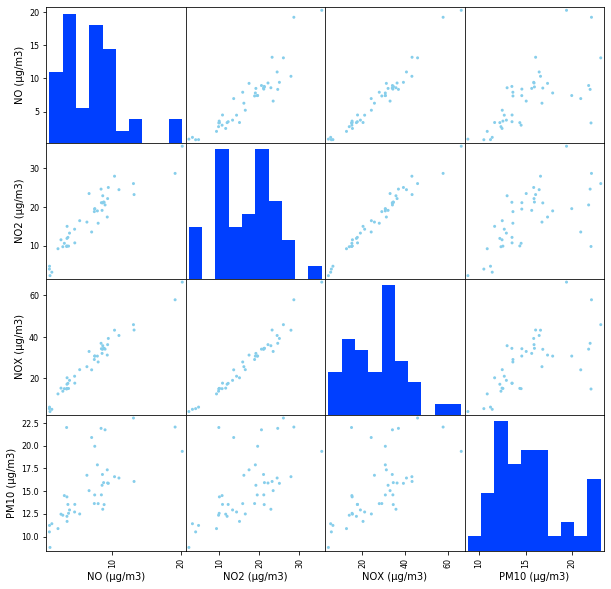

In [22]:
#df_sub_2.rename(columns={'PM10 (µg/m3)': "$PM_1$$_0$ (µg/$m^3$)", "NO2 (µg/m3)": "$NO_2$ (µg/$m^3$)", "NOX (µg/m3)":"$NO_x$ (µg/$m^3$)" }, inplace=True)        
scatter_matrix(df_sub_2, alpha=1, figsize=(10,10), color="skyblue")
#plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/matrix_scatter_pm10.png", dpi=300) #ruta imagen guardada
plt.show()

*Las variables NO2 y NO presentan alta correlación. Luego NOx = NO + NO2*

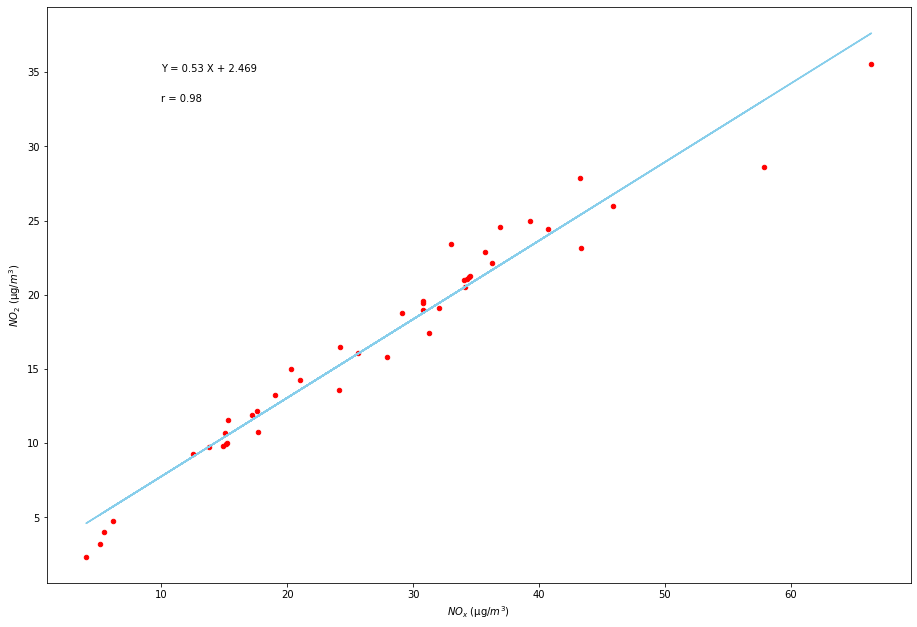

In [23]:
x = df_sub["NOX (µg/m3)"] #todos los valores de la variable VA
y = df_sub["NO2 (µg/m3)"] #todos los valores de la variable VB
#Calculando los coeficientes del ajuste de regresión:
a, b = np.polyfit(x, y, 1) # 1 es el grado del polinomio
r = np.corrcoef(x, y) # r = coeficiente de correlación
#print("R:", r, "a:", a, "b:", b) # b: pendiente de la recta, a: ordenada en la vertical (Y = bX + a)
plt.subplot(111)
plt.scatter(x,y, color="r", s=20)
plt.xlabel("$NO_x$ (µg/$m^3$)")
plt.ylabel("$NO_2$ (µg/$m^3$)")
plt.plot(x, a * x + b, color="skyblue")
plt.text(10,33, 'r = {0:2.2f}'.format(r[0,1]))
plt.text(10,35, 'Y = {0:2.2f} X + {1:2.3f}'.format(a,b))
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/scatter_NOX_NO2.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2, wspace=0.2, hspace=0.2)
plt.show()

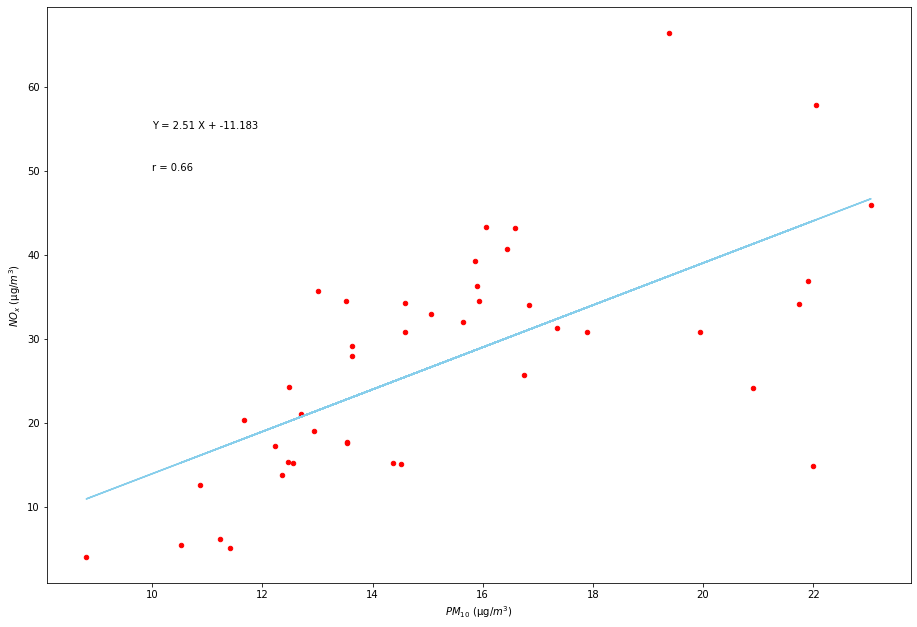

In [24]:
x = df_sub["PM10 (µg/m3)"] #todos los valores de la variable VA
y = df_sub["NOX (µg/m3)"] #todos los valores de la variable VB
#Calculando los coeficientes del ajuste de regresión:
a, b = np.polyfit(x, y, 1) # 1 es el grado del polinomio
r = np.corrcoef(x, y) # r = coeficiente de correlación
#print("R:", r, "a:", a, "b:", b) # b: pendiente de la recta, a: ordenada en la vertical (Y = bX + a)
plt.subplot(111)
plt.scatter(x,y, color="r", s=20)
plt.xlabel("$PM_1$$_0$ (µg/$m^3$)")
plt.ylabel("$NO_x$ (µg/$m^3$)")
plt.plot(x, a * x + b, color="skyblue")
plt.text(10,50, 'r = {0:2.2f}'.format(r[0,1]))
plt.text(10,55, 'Y = {0:2.2f} X + {1:2.3f}'.format(a,b))
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/scatter_pm10_NOX.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2, wspace=0.2, hspace=0.2)
plt.show()

**Modelo de ajuste de la variable PM10**: 

In [25]:
df_pm10 = pd.read_excel("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/variogramas_globales_pm10.xlsx")
df_pm10["h"] = (df_pm10["h"]/10000)
df_pm10.head()

,h,0,45,90,135
0,1.0,9.52443,23.51000,14.05940,7.64377
1,2.0,11.82030,13.88540,7.80702,13.29370
2,3.0,5.07248,12.78910,11.63120,3.52479
3,4.0,6.37612,11.96190,6.85256,6.88909
4,5.0,17.89950,3.88709,9.44951,2.94736


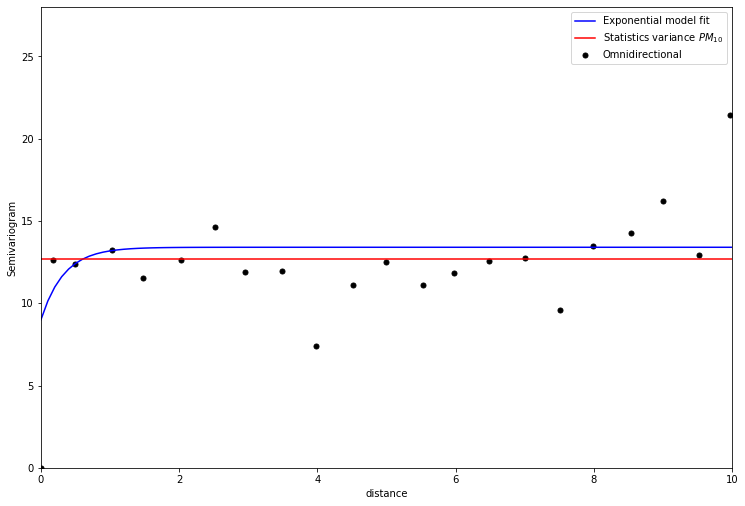

In [26]:
#lagiso = tamaño del paso, varioiso = semivarianza, nppiso = N° de pares de datos por paso.

lagiso, varioiso, nppiso = GSLIB.gamv_2d(df,'Coordenates X (ETRS89)','Coordenates Y (ETRS89)','PM10 (µg/m3)',20,0.5,0,90,0)

plt.scatter(lagiso,varioiso,s=25,marker='o', color = 'black',label = 'Omnidirectional')

x = np.arange(0,11,0.1)
y = 9 + (1 - (exp(-3*x/1)))*4.4
plt.plot(x,y, color = 'blue', label="Exponential model fit")

plt.plot([0,10],[df["PM10 (µg/m3)"].var(),df["PM10 (µg/m3)"].var()],color = 'red', label = 'Statistics variance $PM_1$$_0$')



plt.xlabel('distance')
plt.ylabel('Semivariogram')
plt.title('')
plt.ylim(0,28)
plt.xlim(0,10)
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/semivariograma_pm10_exp.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

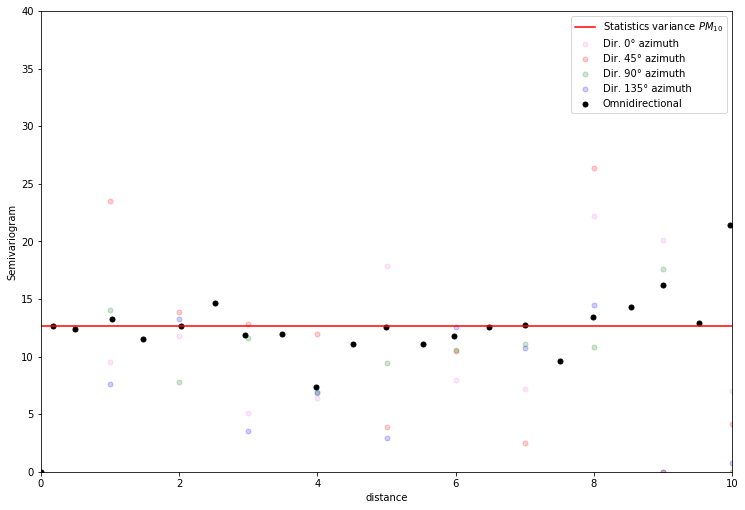

In [27]:

plt.scatter(df_pm10["h"],df_pm10[0],s=25,marker='o', color = 'violet',label = 'Dir. 0° azimuth', alpha="0.2")
plt.scatter(df_pm10["h"],df_pm10[45],s=25,marker='o', color = 'red',label = 'Dir. 45° azimuth', alpha="0.2")
plt.scatter(df_pm10["h"],df_pm10[90],s=25,marker='o', color = 'green',label = 'Dir. 90° azimuth', alpha="0.2")
plt.scatter(df_pm10["h"],df_pm10[135],s=25,marker='o', color = 'blue',label = 'Dir. 135° azimuth', alpha="0.2")

plt.scatter(lagiso,varioiso,s=25,marker='o', color = 'black',label = 'Omnidirectional')
plt.plot([0,11],[df["PM10 (µg/m3)"].var(),df["PM10 (µg/m3)"].var()],color = "red", label = 'Statistics variance $PM_1$$_0$')

plt.xlabel('distance')
plt.ylabel('Semivariogram')
plt.title('')
plt.ylim(0,40)
plt.xlim(0,10)

handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/semivariograma_pm10_direccional.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

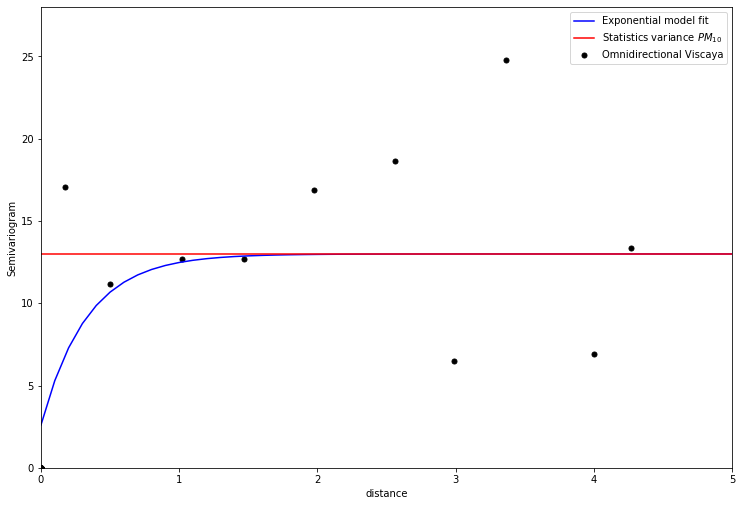

In [28]:


lagiso_bis, varioiso_bis, nppiso_bis = GSLIB.gamv_2d(df_bis,'Coordenates X (ETRS89)','Coordenates Y (ETRS89)','PM10 (µg/m3)',20,0.5,0,90,0)


x = np.arange(0,10,0.1)
y = 2.6 + (1 - (exp(-3*x/1)))*(12.993161787338693-2.6)

plt.scatter(lagiso_bis,varioiso_bis,s=25,marker='o',color = 'black',label = 'Omnidirectional Viscaya')
#plt.plot([0,5],[df["PM10 (µg/m3)"].var(),df["PM10 (µg/m3)"].var()],color = 'red')

plt.plot(x,y, color = 'blue', label="Exponential model fit")

plt.plot([0,5],[df_bis["PM10 (µg/m3)"].var(),df_bis["PM10 (µg/m3)"].var()],color = 'red', label="Statistics variance $PM_1$$_0$")

plt.xlabel("distance")
plt.ylabel('Semivariogram')
plt.title('')
plt.ylim(0,28)
plt.xlim(0,5)
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/semivariograma_pm10_Viscaya.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

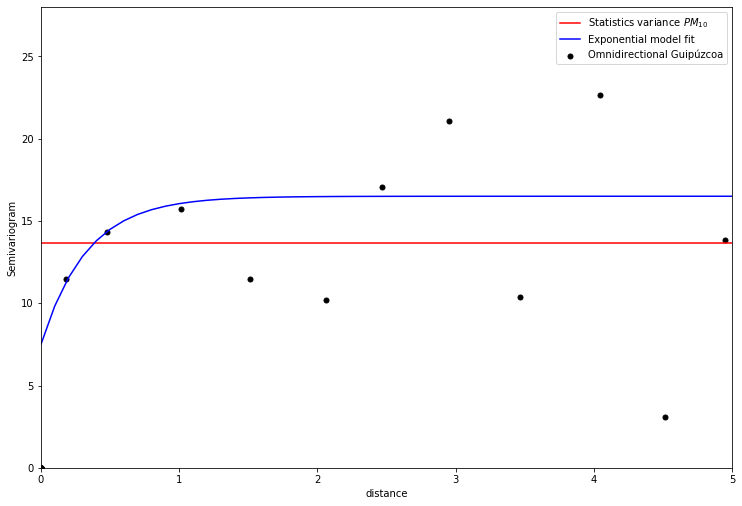

In [29]:
lagiso_gip, varioiso_gip, nppiso_gip = GSLIB.gamv_2d(df_gip,'Coordenates X (ETRS89)','Coordenates Y (ETRS89)','PM10 (µg/m3)',20,0.5,0,90,0)

plt.scatter(lagiso_gip,varioiso_gip,s=25,marker='o',color = 'black',label = 'Omnidirectional Guipúzcoa')
plt.plot([0,5],[df_gip["PM10 (µg/m3)"].var(),df_gip["PM10 (µg/m3)"].var()],color = 'red', label="Statistics variance $PM_1$$_0$")


x = np.arange(0,10,0.1)
y = 7.5 + (1 - (exp(-3*x/1)))*(9)

plt.plot(x,y, color = 'blue', label="Exponential model fit")

plt.xlabel('distance')
plt.ylabel('Semivariogram')
plt.title('')
plt.ylim(0,28)
plt.xlim(0,5)
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/semivariograma_pm10_Gipuzkoa.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

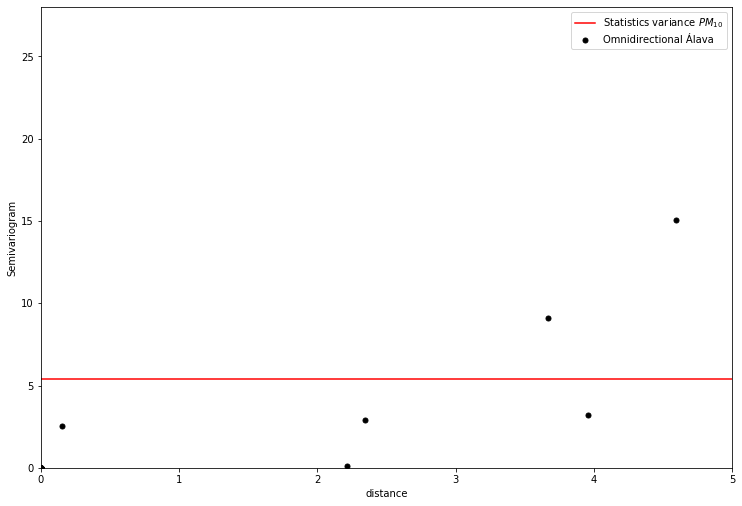

In [30]:
lagiso_ala, varioiso_ala, nppiso_ala = GSLIB.gamv_2d(df_ala,'Coordenates X (ETRS89)','Coordenates Y (ETRS89)','PM10 (µg/m3)',20,0.5,0,90,0)

plt.scatter(lagiso_ala,varioiso_ala,s=25,marker='o',color = 'black',label = 'Omnidirectional Álava')
plt.plot([0,5],[df_ala["PM10 (µg/m3)"].var(),df_ala["PM10 (µg/m3)"].var()],color = 'red', label="Statistics variance $PM_1$$_0$")
plt.xlabel('distance')
plt.ylabel('Semivariogram')
plt.title('')
plt.ylim(0,28)
plt.xlim(0,5)
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/semivariograma_pm10_alava.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

**Modelo de estimación para variable PM10: Datos exportados desde SGeMS e importados en Jupyter**

In [31]:
df2_read = pd.read_excel("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/sgems_datos.xlsx", sep=";", header=None) #Lectura del archivo csv
df2_read.rename(columns={0: 'PM10', 1: 'PM10_VAR'}, inplace=True) #Se renombran las columnas
df2_read.reset_index(drop=True, inplace=True) #Se resetea la numeración de las filas
df2_read.head()

,PM10,PM10_VAR
0,15.77,13.4
1,15.77,13.4
2,15.77,13.4
3,15.77,13.4
4,15.77,13.4


In [32]:
df2_read.count() #1,020,561 de datos estimados. 

PM10        1020558
PM10_VAR    1020558
dtype: int64

In [33]:
grid_y = np.linspace(48.106,58.446, num=1034, endpoint=False) #Coord. de origen x, coord. de termino x, nª de celdas x.
grid_x = np.linspace(470.737,480.607, num=987, endpoint=False) #Coord. de origen y, coord. de termino y, nª de celdas y.

#En este caso la matriz es de 100 x 100 celdas.

gy = np.array(grid_y) #conversión a un array de numpy 
gx = np.array(grid_x) #conversión a un array de numpy 

yg, xg = np.meshgrid(grid_x, grid_y, indexing='ij') #Creación de la grilla (intersecciones en yg; xg)

x_g = xg.ravel() #aplanamiento de xg
y_g = yg.ravel() #aplanamiento de yg

#plt.subplot(111)
#plt.scatter(xg,yg)
#plt.xlabel("Este [X]")
#plt.ylabel("Norte [Y]")
#plt.title("Grid X-Y")
#plt.grid(True)
#plt.subplots_adjust(left=0.0, bottom=0.0, right=0.8, top=1, wspace=0.2, hspace=0.2)
#plt.show()

In [34]:
d = {'Este [X]': x_g, 'Norte [Y]': y_g} #Columnas con coordenadas X e Y.
df3 = pd.DataFrame(data=d) #Creación del dataframe 
df3["PM10"] = df2_read["PM10"] #Traspaso de la columna VA al nuevo DataFrame.
df3["PM10_VAR"] = df2_read["PM10_VAR"] #Traspaso de la columna VAR_VA al nuevo DataFrame.
df3.head()

,Este [X],Norte [Y],PM10,PM10_VAR
0,48.106,470.737,15.77,13.4
1,48.116,470.737,15.77,13.4
2,48.126,470.737,15.77,13.4
3,48.136,470.737,15.77,13.4
4,48.146,470.737,15.77,13.4


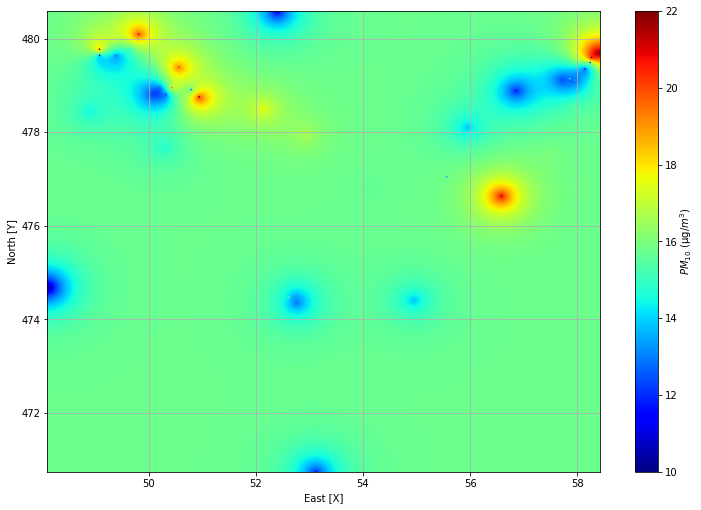

In [58]:
marker_size=0.5
plt.subplot(111)
plt.scatter(df3["Este [X]"], df3["Norte [Y]"], marker_size, df3["PM10"], cmap = cmap)
plt.scatter(df["Coordenates X (ETRS89)"], df["Coordenates Y (ETRS89)"], marker_size, df["PM10 (µg/m3)"], cmap = cmap)
plt.xlabel('East [X]')
plt.ylabel('North [Y]')
plt.title('')
plt.grid(True)
cbar=plt.colorbar()
plt.clim(10,22)
plt.xlim(df["Coordenates X (ETRS89)"].min(),df["Coordenates X (ETRS89)"].max())
plt.ylim(df["Coordenates Y (ETRS89)"].min(), df["Coordenates Y (ETRS89)"].max())
cbar.set_label("$PM_1$$_0$ (µg/$m^3$)", labelpad=+1)
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/kriging_simple_pm10.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

In [36]:
df3.to_csv("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/" + "estimacion_ks_pm10.csv", index=False) #salida del archivo .CSV
df3.head()

,Este [X],Norte [Y],PM10,PM10_VAR
0,48.106,470.737,15.77,13.4
1,48.116,470.737,15.77,13.4
2,48.126,470.737,15.77,13.4
3,48.136,470.737,15.77,13.4
4,48.146,470.737,15.77,13.4


In [37]:
df3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Este [X],1020558.0,53.271000,2.984901,48.1060,50.6860,53.2710,55.856,58.4360
Norte [Y],1020558.0,475.667000,2.849224,470.7370,473.1970,475.6670,478.137,480.5970
PM10,1020558.0,15.746878,0.220900,13.4929,15.7282,15.7649,15.770,18.2652
PM10_VAR,1020558.0,13.327209,0.213602,11.2615,13.3704,13.3986,13.400,13.4000


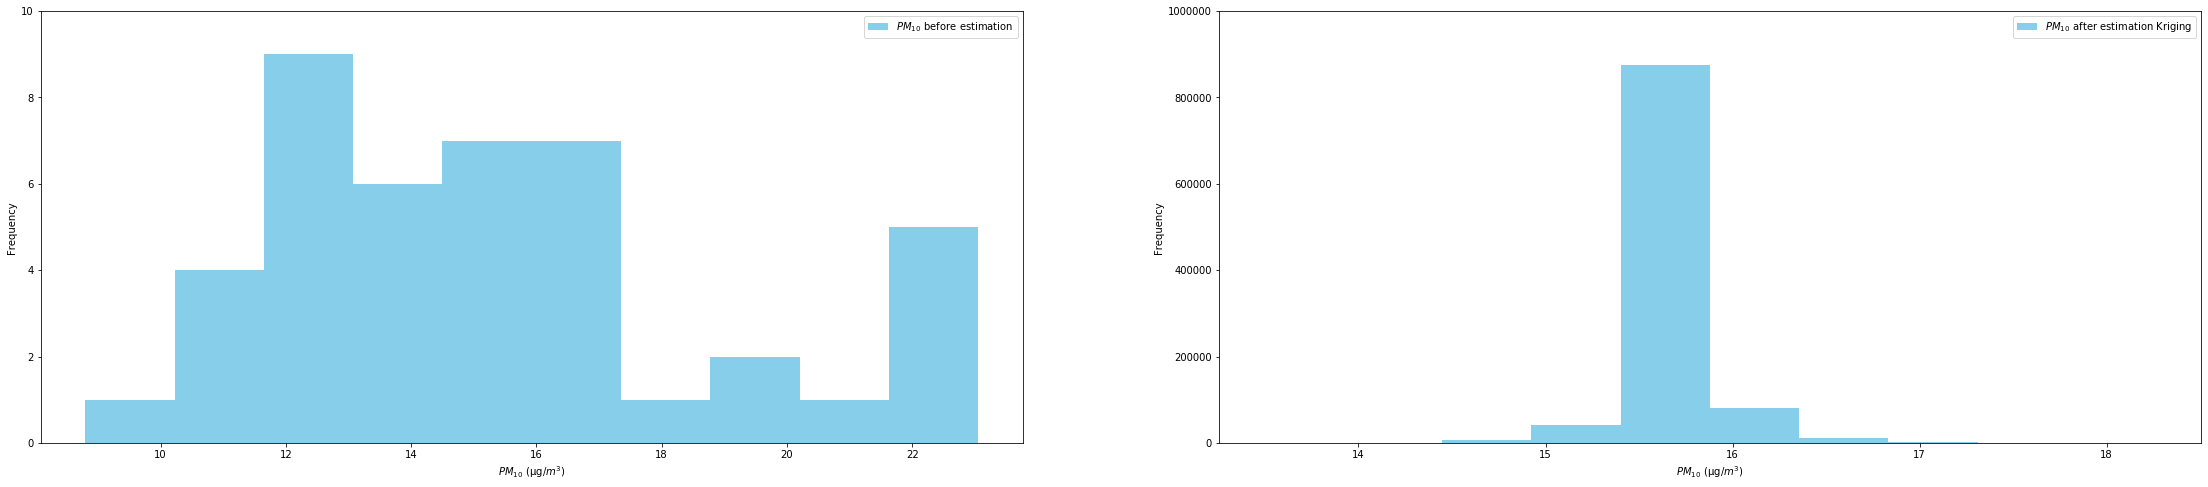

In [38]:
fig = plt.figure(figsize=(15,6))
plt.subplot(121)

plt.hist(df["PM10 (µg/m3)"], color="skyblue", label="$PM_1$$_0$ before estimation")
plt.xlabel("$PM_1$$_0$ (µg/$m^3$)")
plt.ylabel('Frequency')
plt.ylim(0,10)
plt.legend()
plt.subplot(122)
plt.hist(df3["PM10"], color="skyblue",label="$PM_1$$_0$ after estimation Kriging")
plt.xlabel("$PM_1$$_0$ (µg/$m^3$)")
plt.ylabel('Frequency')
plt.ylim(0,1000000)
plt.legend()
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/hist_pm10.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=1, wspace=0.2, hspace=0.2)

plt.show()


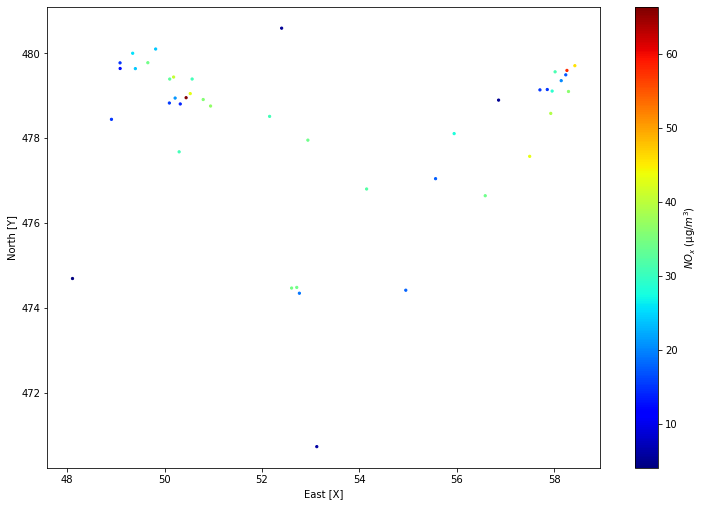

In [39]:
marker_size=5
cmap= plt.cm.jet
plt.subplot(111)
plt.scatter(df["Coordenates X (ETRS89)"], df["Coordenates Y (ETRS89)"], marker_size, df["NOX (µg/m3)"], cmap = cmap)
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
cbar=plt.colorbar()
plt.grid(False)
cbar.set_label('$NO_x$ (µg/$m^3$)', labelpad=+5)
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/puntos_variable_nox.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

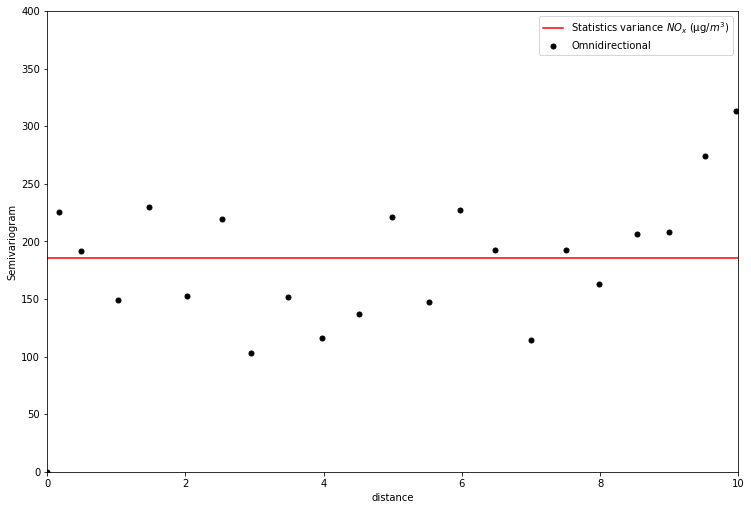

In [40]:
lagiso, varioiso, nppiso = GSLIB.gamv_2d(df,'Coordenates X (ETRS89)','Coordenates Y (ETRS89)','NOX (µg/m3)',20,0.5,0,90,0)

plt.scatter(lagiso,varioiso,s=25,marker='o', color = 'black',label = 'Omnidirectional')
plt.plot([0,11],[df["NOX (µg/m3)"].var(),df["NOX (µg/m3)"].var()],color = "red", label = 'Statistics variance $NO_x$ (µg/$m^3$)')

plt.xlabel('distance')
plt.ylabel('Semivariogram')
plt.title('')
plt.ylim(0,400)
plt.xlim(0,10)

handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/semivariograma_nox.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

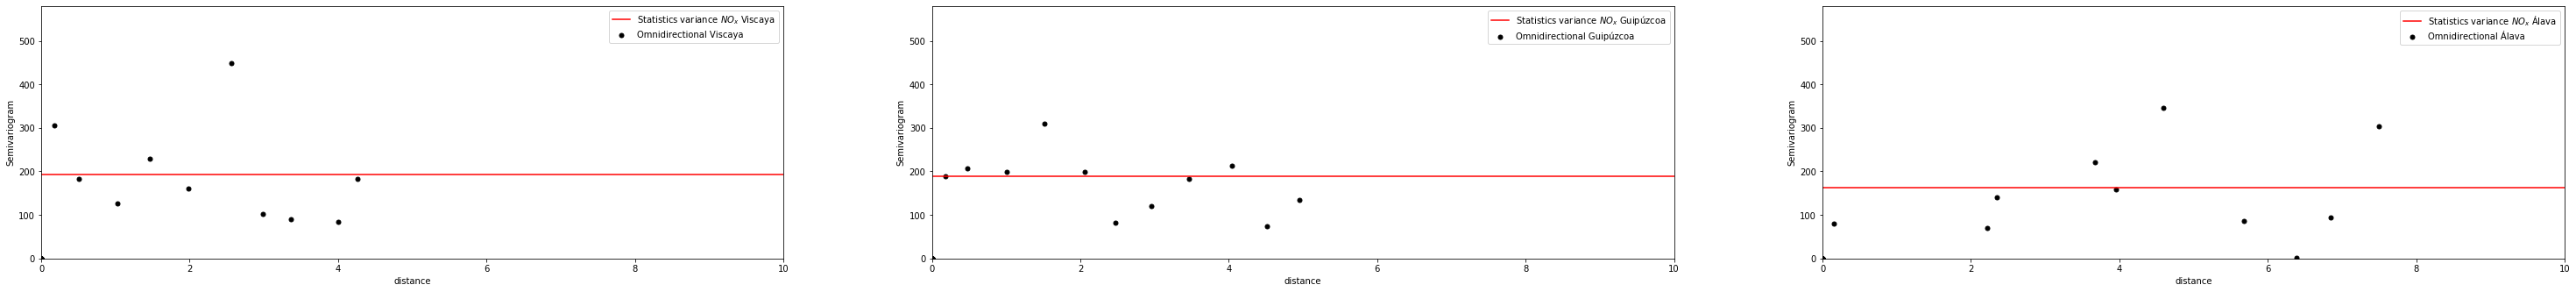

In [41]:
lagiso_bis, varioiso_bis, nppiso_bis = GSLIB.gamv_2d(df_bis,'Coordenates X (ETRS89)','Coordenates Y (ETRS89)','NOX (µg/m3)',20,0.5,0,90,0)
lagiso_gip, varioiso_gip, nppiso_gip = GSLIB.gamv_2d(df_gip,'Coordenates X (ETRS89)','Coordenates Y (ETRS89)','NOX (µg/m3)',20,0.5,0,90,0)
lagiso_ala, varioiso_ala, nppiso_ala = GSLIB.gamv_2d(df_ala,'Coordenates X (ETRS89)','Coordenates Y (ETRS89)','NOX (µg/m3)',20,0.5,0,90,0)

fig = plt.figure(figsize=(16,4))

plt.subplot(131)
plt.scatter(lagiso_bis,varioiso_bis,s=25,marker='o', color = 'black',label = 'Omnidirectional Viscaya')
plt.plot([0,11],[df_bis["NOX (µg/m3)"].var(),df_bis["NOX (µg/m3)"].var()],color = "red", label = 'Statistics variance $NO_x$ Viscaya')

plt.xlabel('distance')
plt.ylabel('Semivariogram')
plt.title('')
plt.ylim(0,580)
plt.xlim(0,10)

handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])

plt.subplot(132)
plt.scatter(lagiso_gip,varioiso_gip,s=25,marker='o', color = 'black',label = 'Omnidirectional Guipúzcoa')
plt.plot([0,11],[df_gip["NOX (µg/m3)"].var(),df_gip["NOX (µg/m3)"].var()],color = "red", label = 'Statistics variance $NO_x$ Guipúzcoa')

plt.xlabel('distance')
plt.ylabel('Semivariogram')
plt.title('')
plt.ylim(0,580)
plt.xlim(0,10)

handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])


plt.subplot(133)
plt.scatter(lagiso_ala,varioiso_ala,s=25,marker='o', color = 'black',label = 'Omnidirectional Álava')
plt.plot([0,11],[df_ala["NOX (µg/m3)"].var(),df_ala["NOX (µg/m3)"].var()],color = "red", label = 'Statistics variance $NO_x$ Álava')

plt.xlabel('distance')
plt.ylabel('Semivariogram')
plt.title('')
plt.ylim(0,580)
plt.xlim(0,10)

handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])

plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/semivariogramas_s_nox.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=1, wspace=0.2, hspace=0.2)
plt.show()

In [42]:
import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt
from matplotlib import cm

In [103]:
x = df["Coordenates X (ETRS89)"]
y = df["Coordenates Y (ETRS89)"]
z = df["PM10 (µg/m3)"]
z2 = df["NOX (µg/m3)"]

In [106]:
# use RBF
rbf = Rbf(x, y, z, function="linear")
rbf2 = Rbf(x, y, z2, function="linear")
ZI = rbf(xg, yg)
ZI2 = rbf2(xg, yg)

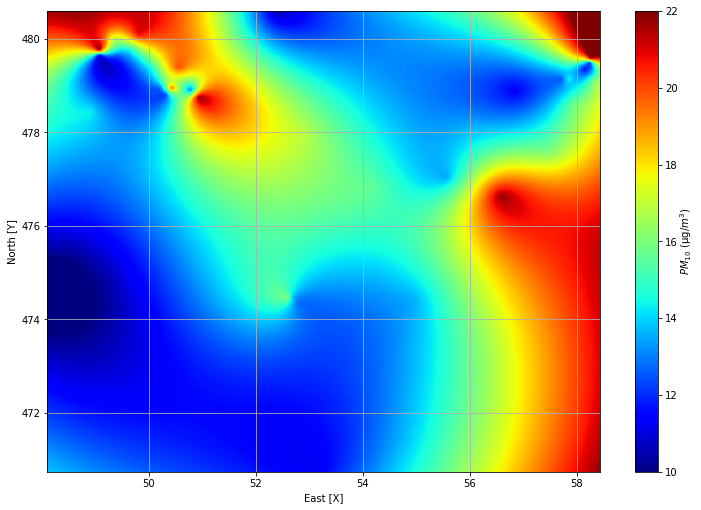

In [107]:
marker_size=0.5
plt.subplot(111)
plt.scatter(x, y, marker_size, z, cmap=cm.jet)
plt.pcolor(xg, yg, ZI, cmap=cm.jet)
plt.xlabel('East [X]')
plt.ylabel('North [Y]')
plt.title('')
plt.grid(True)
cbar=plt.colorbar()
plt.clim(10,22)
cbar.set_label("$PM_1$$_0$ (µg/$m^3$)", labelpad=+1)
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/RBF_pm10.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

In [46]:
df_ZI = pd.DataFrame(ZI)
a = df_ZI.values.flatten()
a2 = pd.DataFrame (a)
a2.describe().transpose()

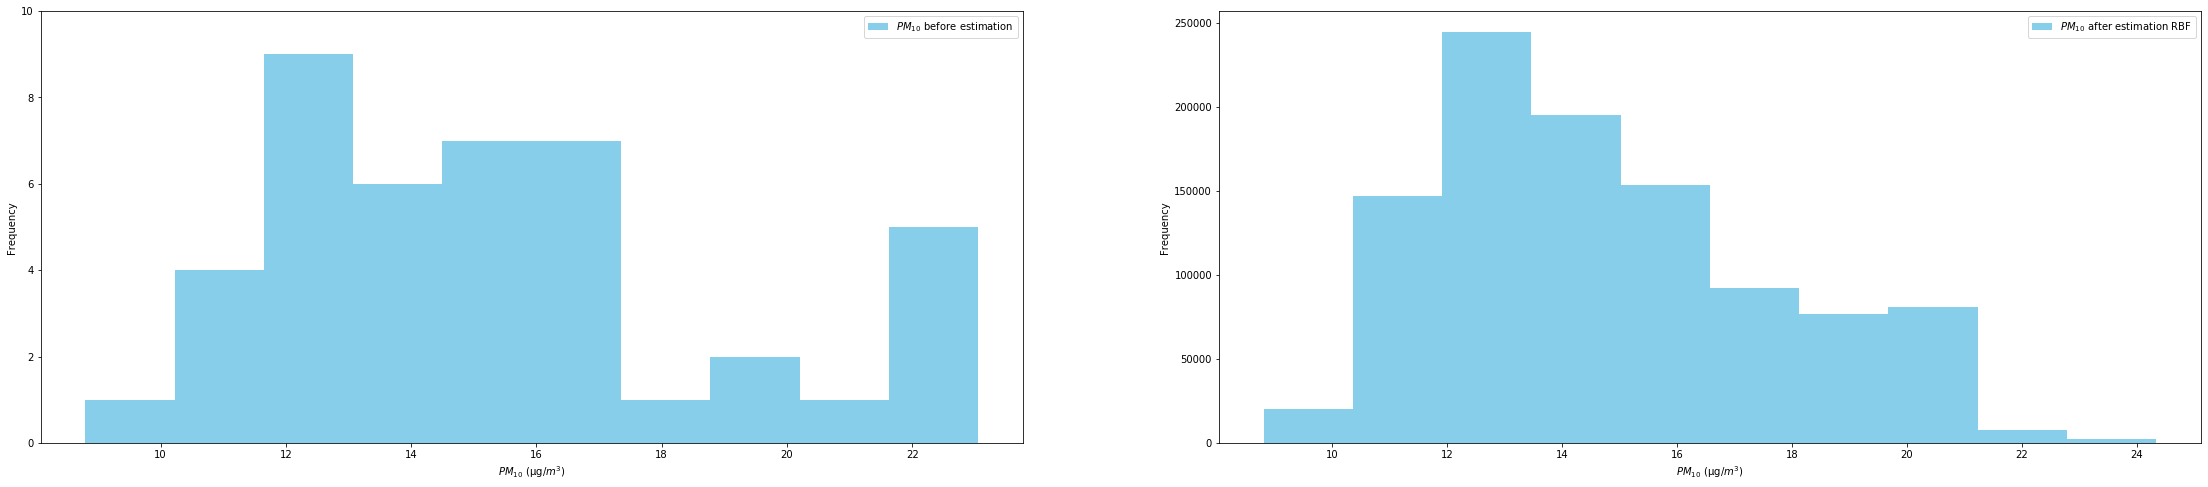

In [50]:
fig = plt.figure(figsize=(15,6))
plt.subplot(121)

plt.hist(df["PM10 (µg/m3)"], color="skyblue", label="$PM_1$$_0$ before estimation")
plt.xlabel("$PM_1$$_0$ (µg/$m^3$)")
plt.ylabel('Frequency')
plt.ylim(0,10)
plt.legend()
plt.subplot(122)
plt.hist(a2[0], color="skyblue",label="$PM_1$$_0$ after estimation RBF")
plt.xlabel("$PM_1$$_0$ (µg/$m^3$)")
plt.ylabel('Frequency')
#plt.ylim(0,1000000)
plt.legend()
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/hist_rbf_pm10.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=1, wspace=0.2, hspace=0.2)

plt.show()


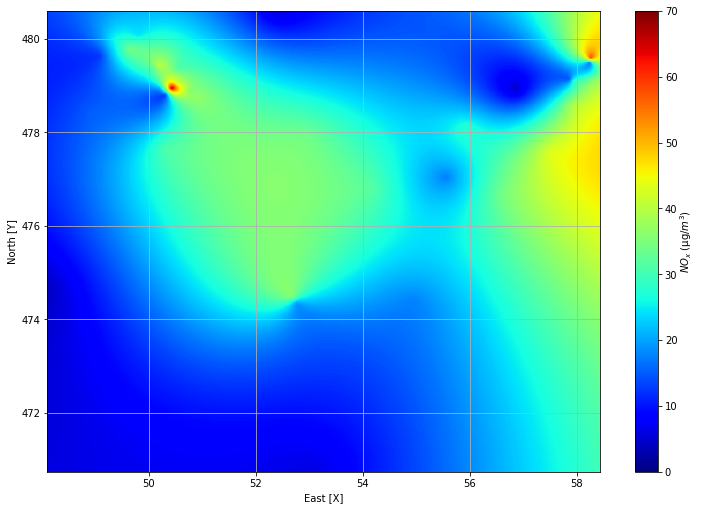

In [75]:
marker_size=0.5
plt.subplot(111)
plt.scatter(x, y, marker_size, z2, cmap=cm.jet)
plt.pcolor(xg, yg, ZI2, cmap=cm.jet)
plt.xlabel('East [X]')
plt.ylabel('North [Y]')
plt.title('')
plt.grid(True)
cbar=plt.colorbar()
plt.clim(0,70)
cbar.set_label("$NO_x$ (µg/$m^3$)", labelpad=+1)
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/RBF_nox.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

In [78]:
df_ZI2 = pd.DataFrame(ZI2)
a_2 = df_ZI2.values.flatten()
a2_2 = pd.DataFrame (a_2)
a2_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,1020558.0,21.79628,9.740955,4.023963,13.887573,21.231749,29.420731,65.459537


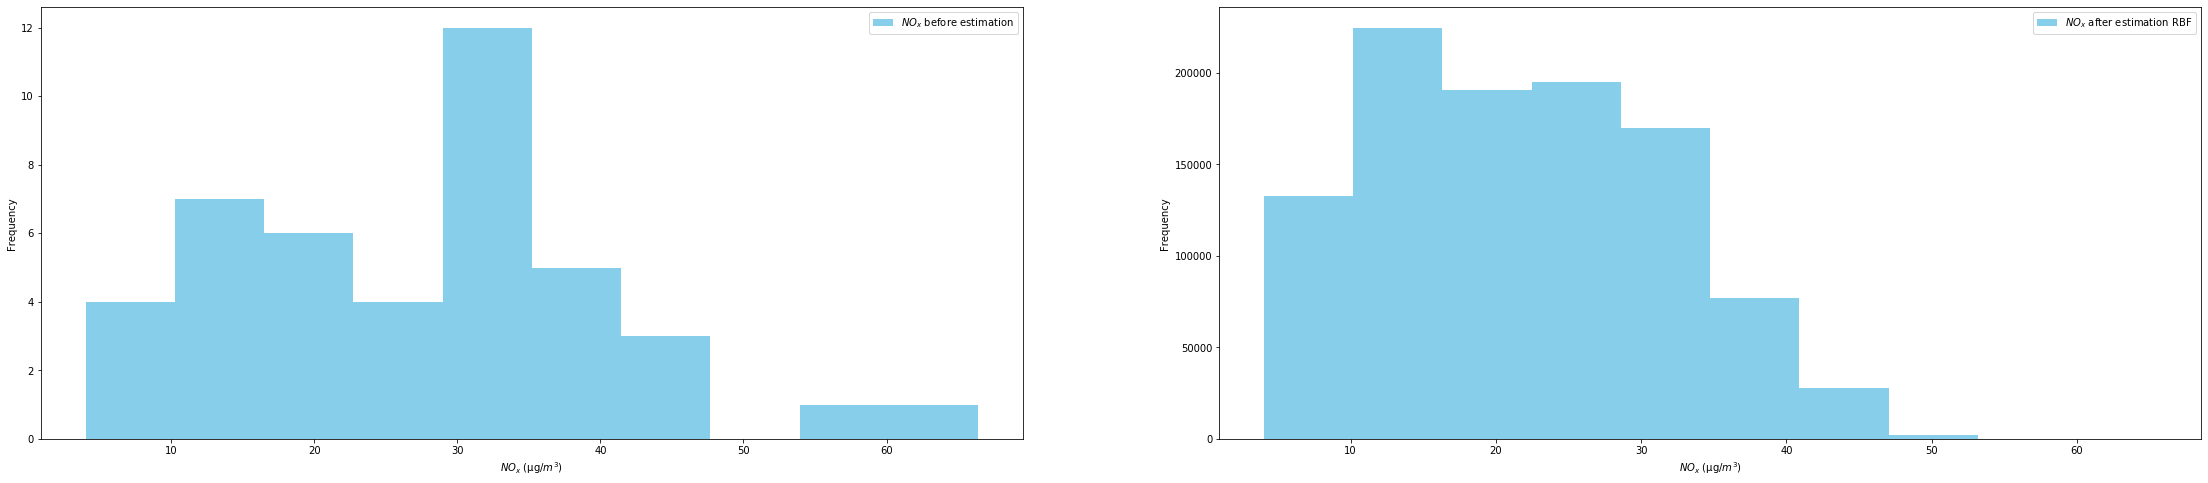

In [79]:
fig = plt.figure(figsize=(15,6))
plt.subplot(121)

plt.hist(df["NOX (µg/m3)"], color="skyblue", label="$NO_x$ before estimation")
plt.xlabel("$NO_x$ (µg/$m^3$)")
plt.ylabel('Frequency')
#plt.ylim(0,10)
plt.legend()
plt.subplot(122)
plt.hist(a2_2[0], color="skyblue",label="$NO_x$ after estimation RBF")
plt.xlabel("$NO_x$ (µg/$m^3$)")
plt.ylabel('Frequency')
#plt.ylim(0,1000000)
plt.legend()
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/hist_rbf_nox.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=1, wspace=0.2, hspace=0.2)

plt.show()

**Metodos de vecinos mas cercanos: Interpolación**

In [51]:
df.head(1)

,id,ESTACION,Coordenates X (ETRS89),Coordenates Y (ETRS89),NO (µg/m3),NO2 (µg/m3),NOX (µg/m3),PM10 (µg/m3),Province,Town,Address
0,1,3_DE_MARZO,52.714144,474.488289,8.782967,21.18956,34.472527,13.518414,Araba/Álava,Vitoria-Gasteiz,"Plaza Tres de Marzo, s/n"


In [52]:
coord = ["Coordenates X (ETRS89)", "Coordenates Y (ETRS89)"]
df_x = df[coord]

points = np.array(df_x)

df_y = df["PM10 (µg/m3)"]
df_z = df["NOX (µg/m3)"]

values = np.array(df_y)
values_2 = np.array(df_z)

In [66]:
from scipy.interpolate import NearestNDInterpolator

myInterpolator = NearestNDInterpolator(points, values)
myInterpolator2 = NearestNDInterpolator(points, values_2)


In [54]:
grid_y = np.linspace(48.106,58.446, num=1034, endpoint=False) #Coord. de origen x, coord. de termino x, nª de celdas x.
grid_x = np.linspace(470.737,480.607, num=987, endpoint=False) #Coord. de origen y, coord. de termino y, nª de celdas y.

#En este caso la matriz es de 100 x 100 celdas.

gy = np.array(grid_y) #conversión a un array de numpy 
gx = np.array(grid_x) #conversión a un array de numpy 

yg, xg = np.meshgrid(grid_x, grid_y, indexing='ij') #Creación de la grilla (intersecciones en yg; xg)

x_g = xg.ravel() #aplanamiento de xg
y_g = yg.ravel() #aplanamiento de yg

#plt.subplot(111)
#plt.scatter(xg,yg)
#plt.xlabel("Este [X]")
#plt.ylabel("Norte [Y]")
#plt.title("Grid X-Y")
#plt.grid(True)
#plt.subplots_adjust(left=0.0, bottom=0.0, right=0.8, top=1, wspace=0.2, hspace=0.2)
#plt.show()

In [67]:
est_pm10 = myInterpolator(x_g,y_g)
est_nox = myInterpolator2(x_g,y_g)

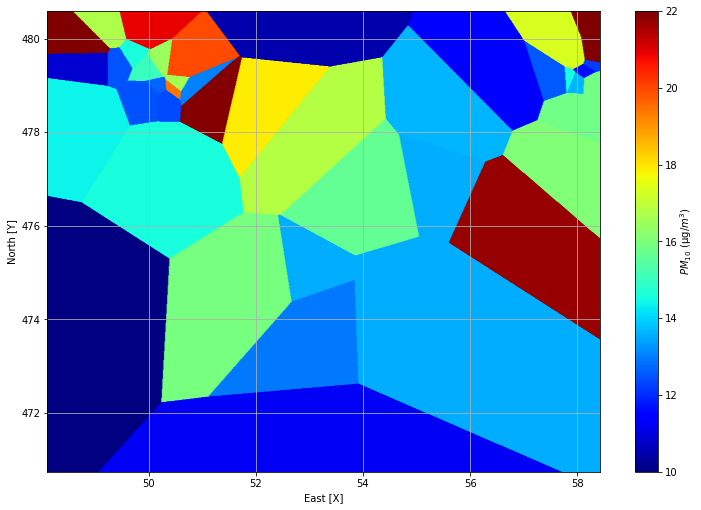

In [57]:
marker_size=0.5
plt.subplot(111)
plt.scatter(df["Coordenates X (ETRS89)"], df["Coordenates Y (ETRS89)"], marker_size, df["PM10 (µg/m3)"], cmap = cmap)
plt.scatter(x_g, y_g, marker_size, est_pm10, cmap = plt.cm.jet)
plt.xlabel('East [X]')
plt.ylabel('North [Y]')
plt.title('')
plt.grid(True)
cbar=plt.colorbar()
plt.clim(10,22)
plt.xlim(df["Coordenates X (ETRS89)"].min(),df["Coordenates X (ETRS89)"].max())
plt.ylim(df["Coordenates Y (ETRS89)"].min(), df["Coordenates Y (ETRS89)"].max())
cbar.set_label("$PM_1$$_0$ (µg/$m^3$)", labelpad=+1)
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/NN_pm10.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

In [63]:
df_nn = pd.DataFrame(est_pm10)
df_nn.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,1020558.0,14.086277,3.426711,8.80117,11.224852,13.538674,15.936813,23.05


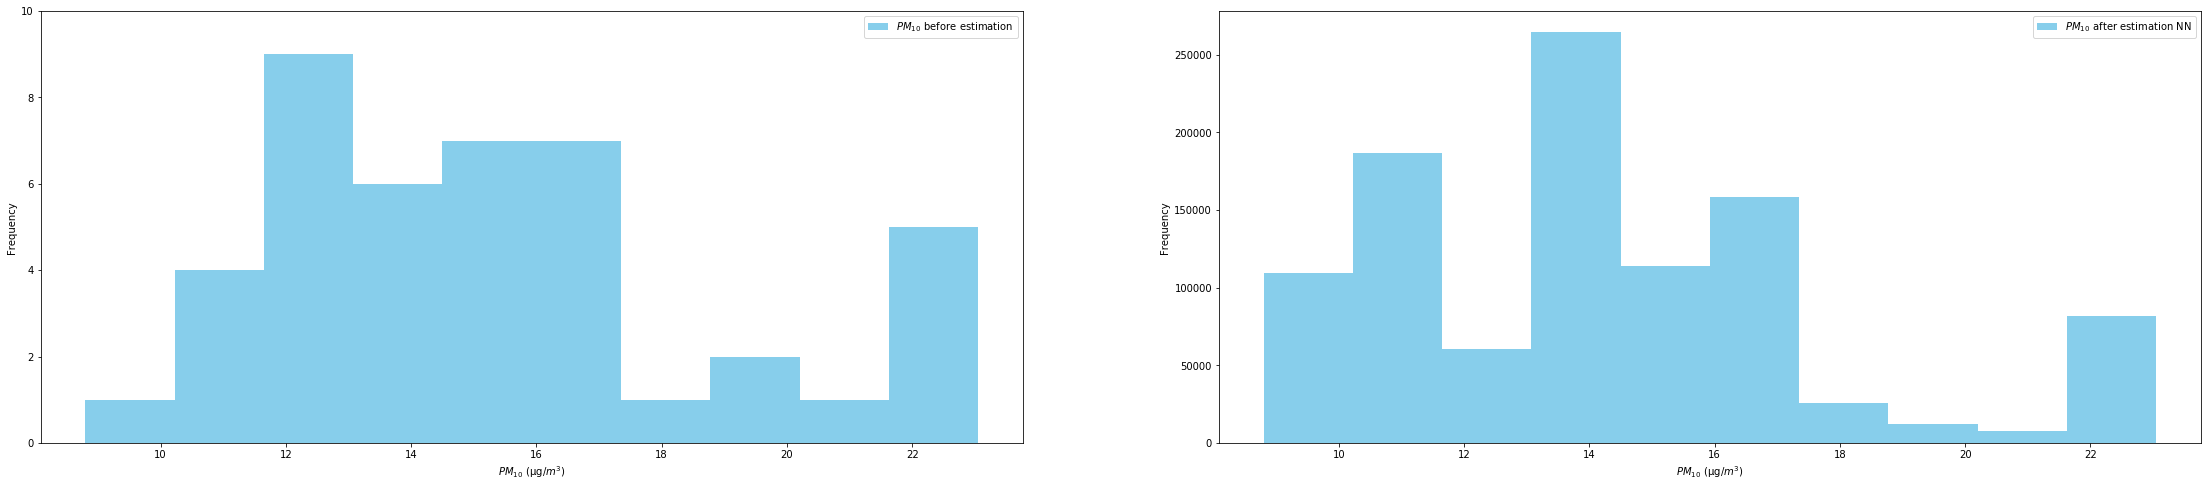

In [64]:
fig = plt.figure(figsize=(15,6))
plt.subplot(121)

plt.hist(df["PM10 (µg/m3)"], color="skyblue", label="$PM_1$$_0$ before estimation")
plt.xlabel("$PM_1$$_0$ (µg/$m^3$)")
plt.ylabel('Frequency')
plt.ylim(0,10)
plt.legend()
plt.subplot(122)
plt.hist(df_nn[0], color="skyblue",label="$PM_1$$_0$ after estimation NN")
plt.xlabel("$PM_1$$_0$ (µg/$m^3$)")
plt.ylabel('Frequency')
#plt.ylim(0,1000000)
plt.legend()
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/hist_nn_pm10.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=1, wspace=0.2, hspace=0.2)

plt.show()

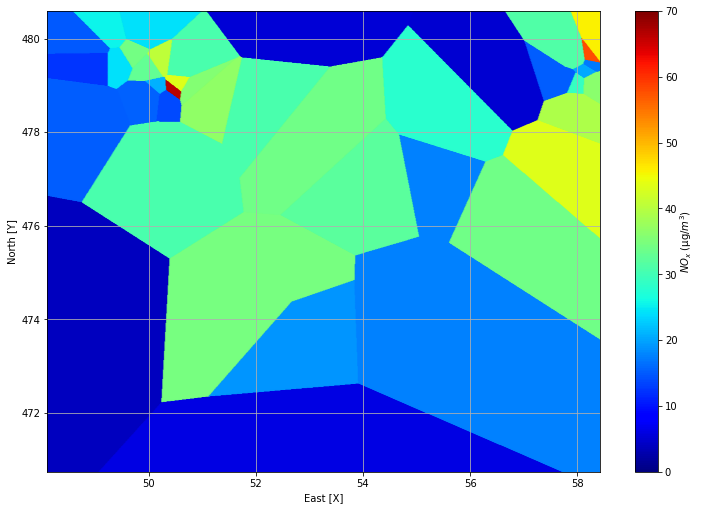

In [76]:
marker_size=0.5
plt.subplot(111)
plt.scatter(df["Coordenates X (ETRS89)"], df["Coordenates Y (ETRS89)"], marker_size, df["NOX (µg/m3)"], cmap = cmap)
plt.scatter(x_g, y_g, marker_size, est_nox, cmap = plt.cm.jet)
plt.xlabel('East [X]')
plt.ylabel('North [Y]')
plt.title('')
plt.grid(True)
cbar=plt.colorbar()
plt.clim(0,70)
plt.xlim(df["Coordenates X (ETRS89)"].min(),df["Coordenates X (ETRS89)"].max())
plt.ylim(df["Coordenates Y (ETRS89)"].min(), df["Coordenates Y (ETRS89)"].max())
cbar.set_label("$NO_x$ (µg/$m^3$)", labelpad=+1)
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/NN_nox.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)
plt.show()

In [80]:
df_nn2 = pd.DataFrame(est_nox)
df_nn2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,1020558.0,20.903571,12.259108,4.025,6.155807,17.708333,32.047619,66.401899


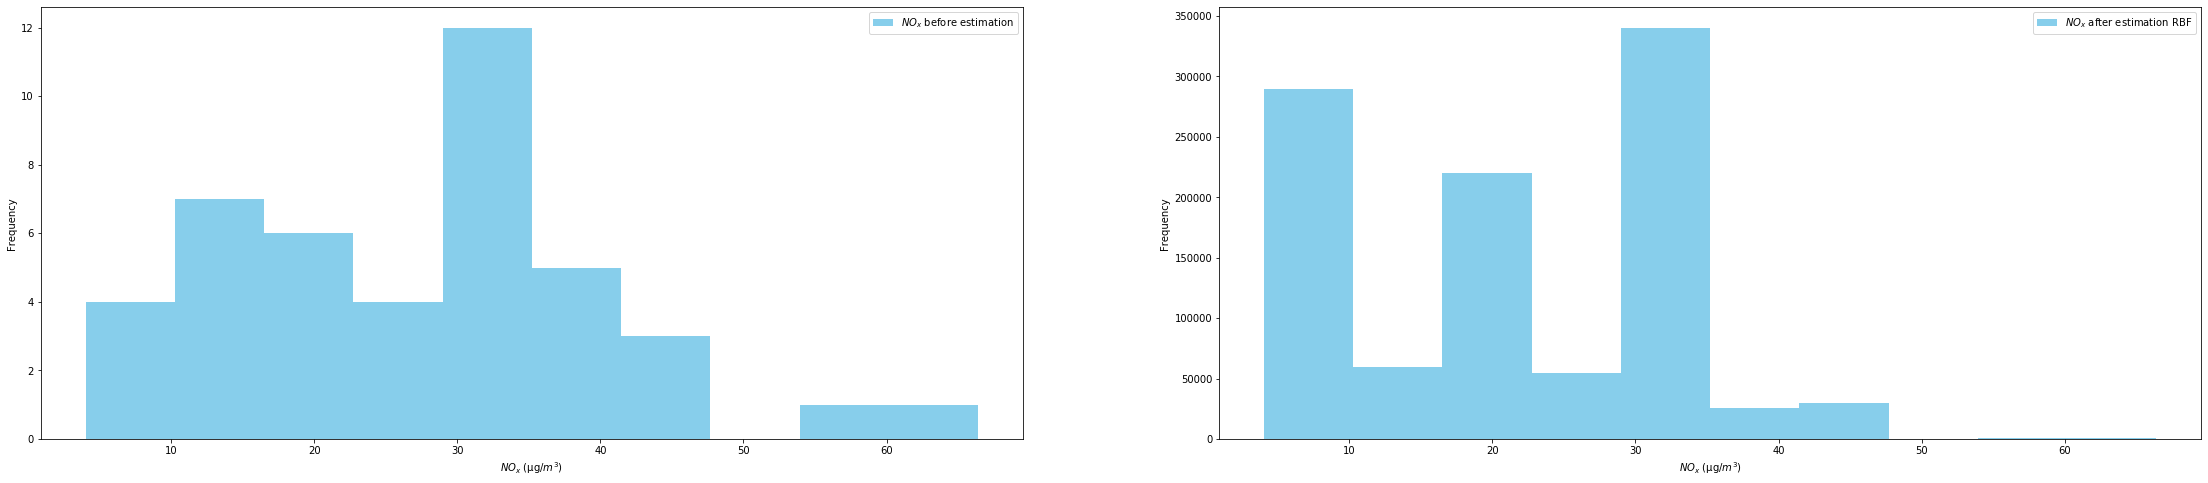

In [81]:
fig = plt.figure(figsize=(15,6))
plt.subplot(121)

plt.hist(df["NOX (µg/m3)"], color="skyblue", label="$NO_x$ before estimation")
plt.xlabel("$NO_x$ (µg/$m^3$)")
plt.ylabel('Frequency')
#plt.ylim(0,10)
plt.legend()
plt.subplot(122)
plt.hist(df_nn2[0], color="skyblue",label="$NO_x$ after estimation RBF")
plt.xlabel("$NO_x$ (µg/$m^3$)")
plt.ylabel('Frequency')
#plt.ylim(0,1000000)
plt.legend()
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/hist_nn_nox.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=1, wspace=0.2, hspace=0.2)

plt.show()

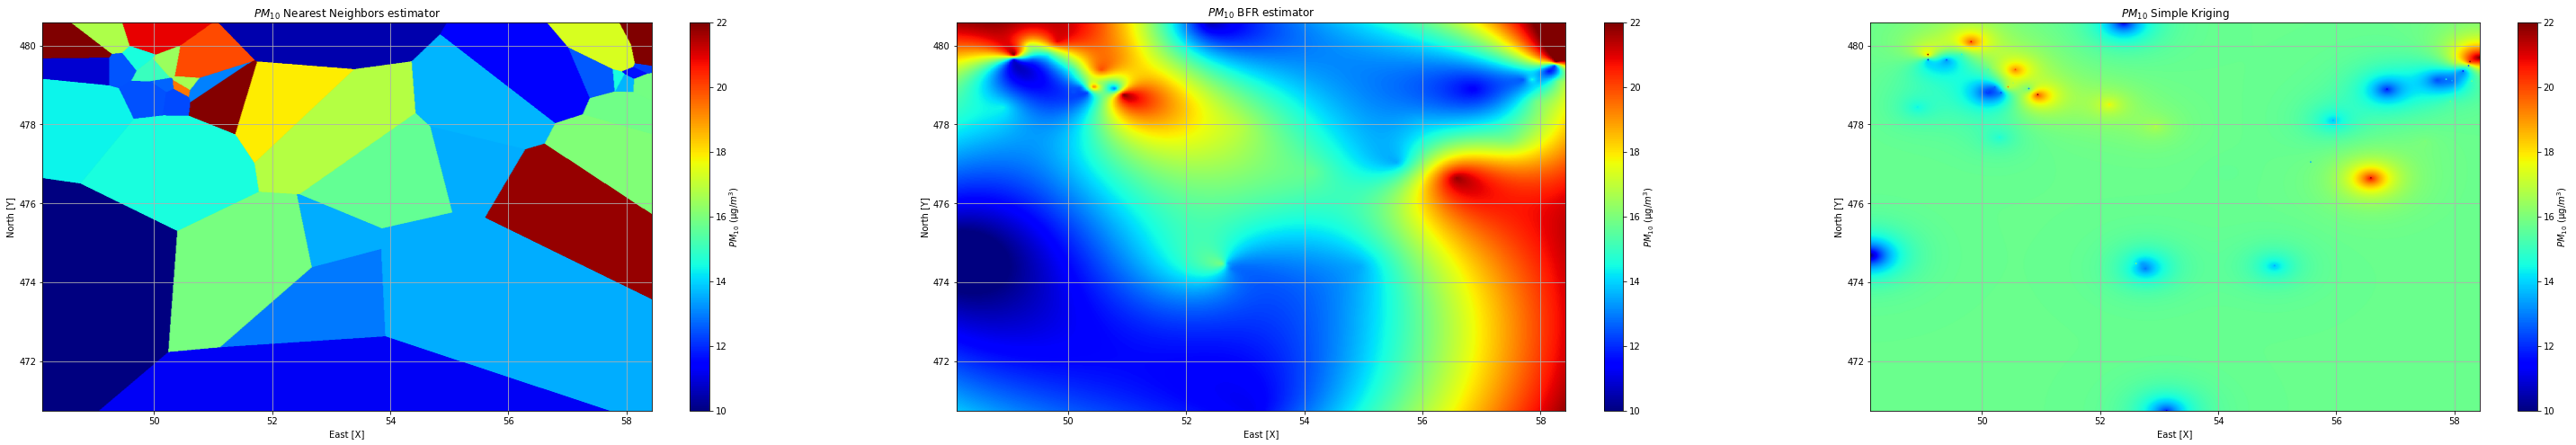

In [59]:
fig = plt.figure(figsize=(16,4))
plt.subplot(131)
plt.scatter(df["Coordenates X (ETRS89)"], df["Coordenates Y (ETRS89)"], marker_size, df["PM10 (µg/m3)"], cmap = cmap)
plt.scatter(x_g, y_g, marker_size, est_pm10, cmap = plt.cm.jet)
plt.xlabel('East [X]')
plt.ylabel('North [Y]')
plt.title('$PM_1$$_0$ Nearest Neighbors estimator')
plt.grid(True)
cbar=plt.colorbar()
plt.clim(10,22)
plt.xlim(df["Coordenates X (ETRS89)"].min(),df["Coordenates X (ETRS89)"].max())
plt.ylim(df["Coordenates Y (ETRS89)"].min(), df["Coordenates Y (ETRS89)"].max())
cbar.set_label("$PM_1$$_0$ (µg/$m^3$)", labelpad=+1)
plt.subplot(132)
plt.scatter(x, y, marker_size, z, cmap=cm.jet)
plt.pcolor(xg, yg, ZI, cmap=cm.jet)
plt.xlabel('East [X]')
plt.ylabel('North [Y]')
plt.title('$PM_1$$_0$ BFR estimator')
plt.grid(True)
cbar=plt.colorbar()
plt.clim(10,22)
plt.xlim(df["Coordenates X (ETRS89)"].min(),df["Coordenates X (ETRS89)"].max())
plt.ylim(df["Coordenates Y (ETRS89)"].min(), df["Coordenates Y (ETRS89)"].max())
cbar.set_label("$PM_1$$_0$ (µg/$m^3$)", labelpad=+1)
plt.subplot(133)
plt.scatter(df3["Este [X]"], df3["Norte [Y]"], marker_size, df3["PM10"], cmap = cmap)
plt.scatter(df["Coordenates X (ETRS89)"], df["Coordenates Y (ETRS89)"], marker_size, df["PM10 (µg/m3)"], cmap = cmap)
plt.xlabel('East [X]')
plt.ylabel('North [Y]')
plt.title('$PM_1$$_0$ Simple Kriging')
plt.grid(True)
cbar=plt.colorbar()
plt.clim(10,22)
plt.xlim(df["Coordenates X (ETRS89)"].min(),df["Coordenates X (ETRS89)"].max())
plt.ylim(df["Coordenates Y (ETRS89)"].min(), df["Coordenates Y (ETRS89)"].max())
cbar.set_label("$PM_1$$_0$ (µg/$m^3$)", labelpad=+1)
plt.savefig("C:/Users/heber/Desktop/PAPER_CALIDAD_AIRE/xxxx_pm10.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=1.5, wspace=0.2, hspace=0.2)

**Cross Validation; leave one out:**

import numpy as np
from sklearn.model_selection import LeaveOneOut
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)

print(loo)

for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)